In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
from project2.util.graphviz import GraphViz

In [3]:
graph_viz = GraphViz()
graph_fp = '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt'

graph_viz.loadGraphFromFile(graph_fp)

In [4]:
from project2.graph import Graph, Point
from project2.search import Searcher, SearchNode

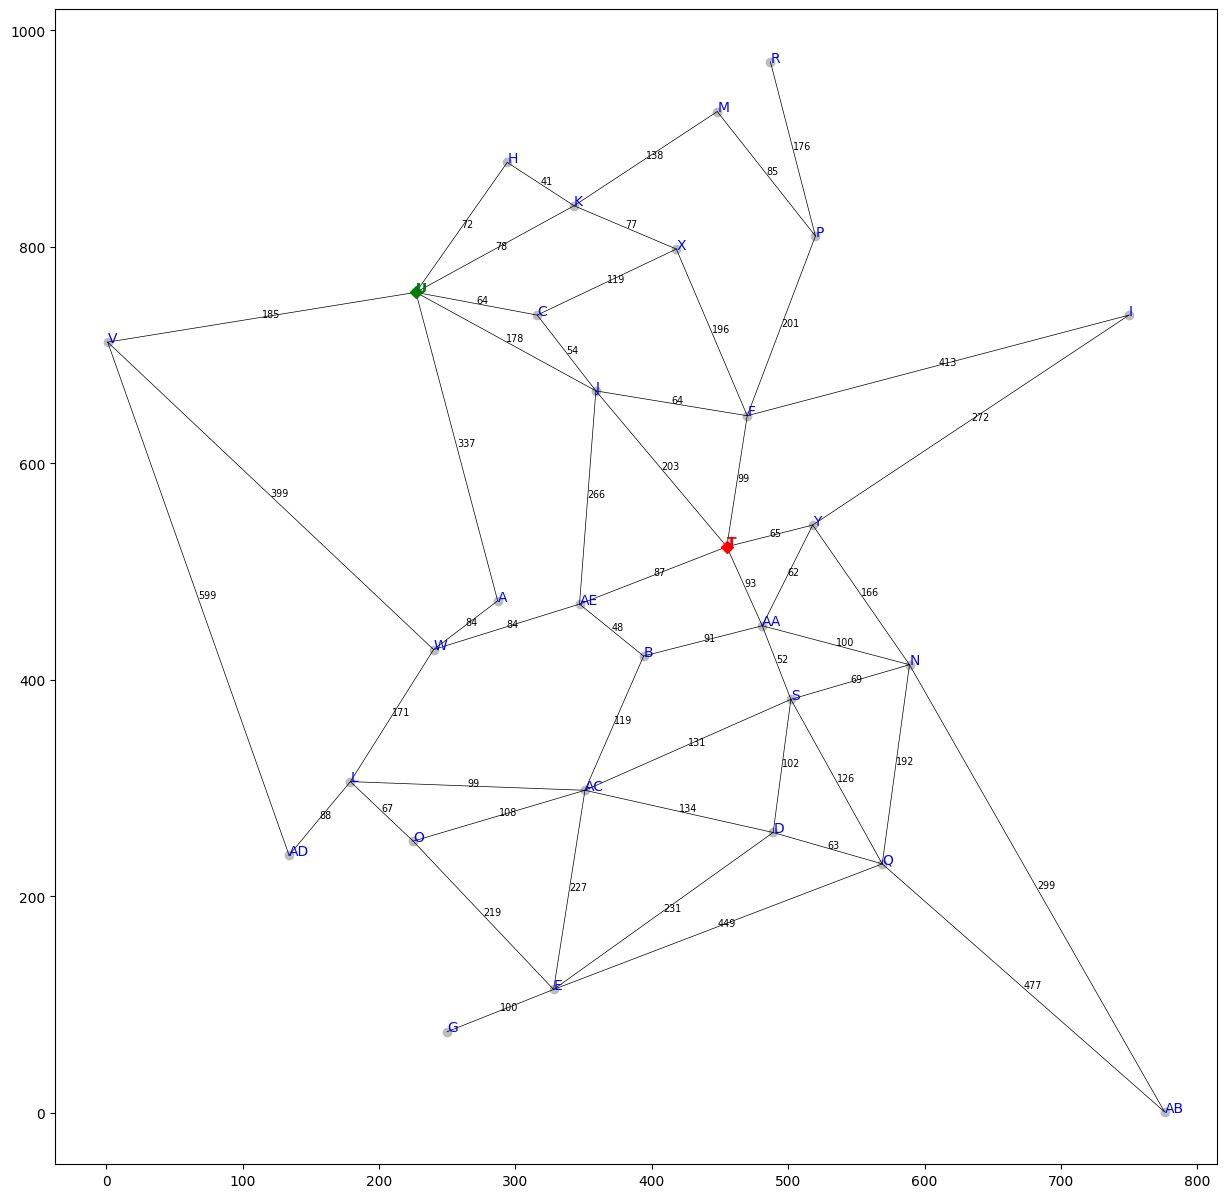

In [5]:
graph = Graph(graph_fp)
searcher = Searcher(graph, 'DFS', 'U', 'T', 0, graph_viz=graph_viz)

In [6]:
print(f'FRONTIER: {searcher.frontier}')

FRONTIER: [(U, 0.00)]


In [7]:
searcher.current_node = searcher.start
children = searcher._expand_node()
print(children)

[(A, 337.00), (C, 64.00), (H, 72.00), (J, 178.00), (K, 78.00), (V, 185.00)]


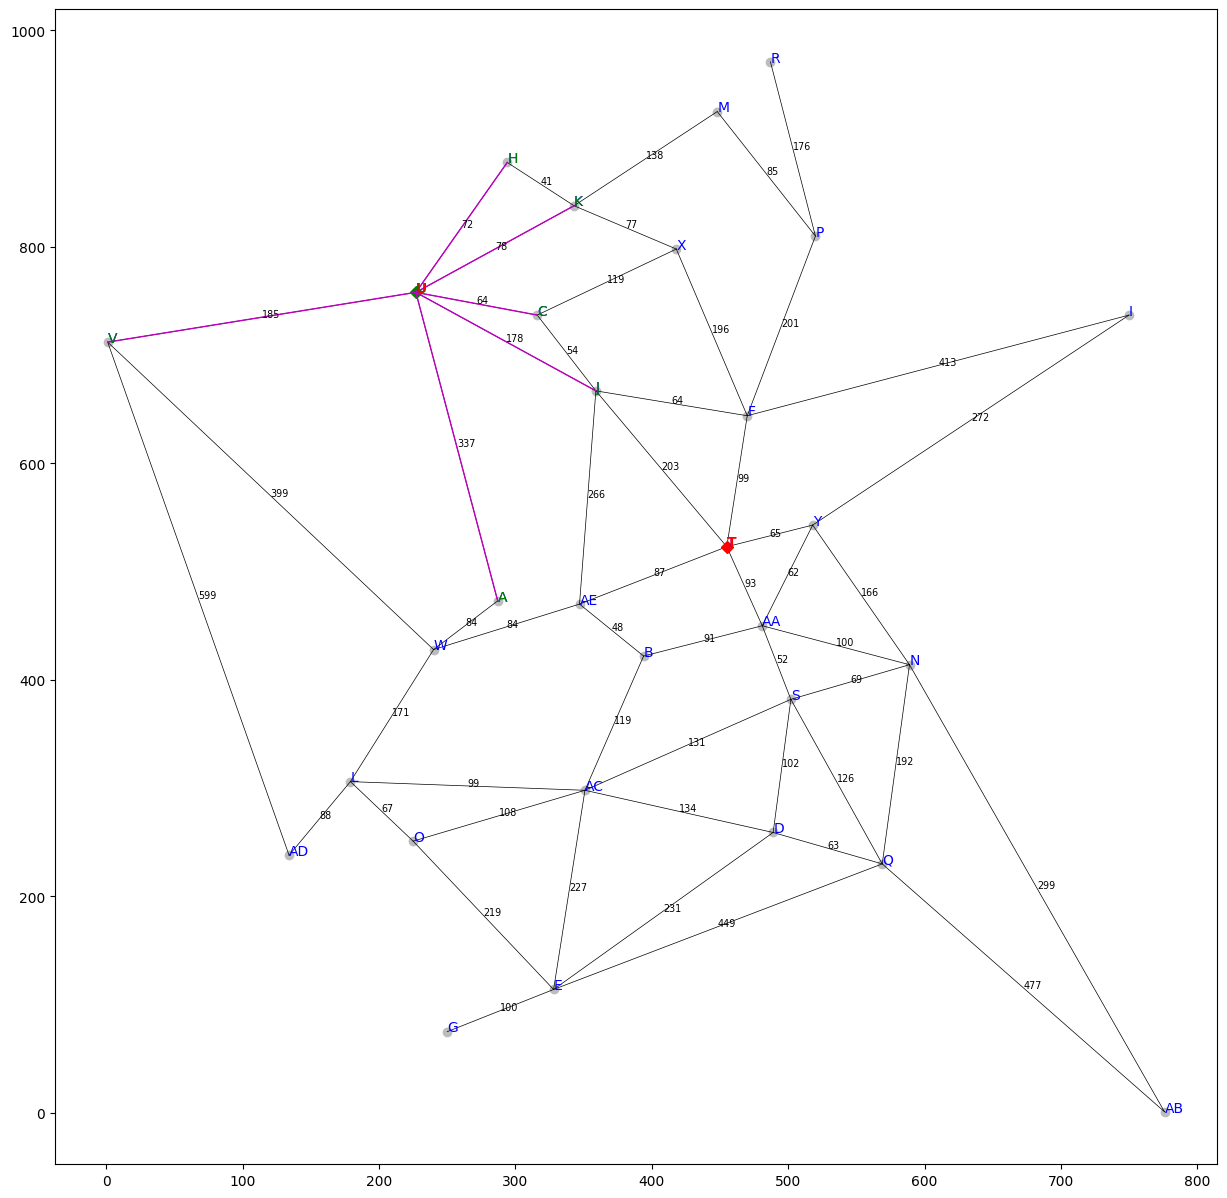

In [8]:
searcher._plotCurrent(children)

In [9]:
searcher._add_children(children)
print(searcher.frontier)

[(A, 337.00), (C, 64.00), (H, 72.00), (J, 178.00), (K, 78.00), (V, 185.00), (U, 0.00)]


In [10]:
searcher = Searcher(graph, 'BFS', 'U', 'T', 0)

searcher.current_node = searcher.start
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)


You have asked for a/an 'BFS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Your start node is '(U, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(U, 0.00), (A, 337.00), (C, 64.00), (H, 72.00), (J, 178.00), (K, 78.00), (V, 185.00)]


In [11]:
searcher = Searcher(graph, 'BEST', 'U', 'T', 0)

searcher.current_node = searcher.frontier.pop()
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)


You have asked for a/an 'BEST' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Your start node is '(U, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(J, 173.07), (A, 175.28), (C, 255.18), (K, 334.32), (H, 389.80), (V, 491.77)]


In [12]:
K = SearchNode('K', heuristic_cost=500)
C = SearchNode('C', heuristic_cost=91)
J = SearchNode('J', heuristic_cost=10)

searcher._add_children([K, C, J])
print(searcher.frontier)

[(J, 10.00), (C, 91.00), (A, 175.28), (K, 334.32), (H, 389.80), (V, 491.77)]


In [13]:
searcher = searcher = Searcher(graph, 'A*', 'V', 'T', 0, heuristic='SLD')
searcher.current_node = searcher.frontier.pop()
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Heuristic 'SLD' will be used.
Your start node is '(V, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(U, 512.43), (W, 634.05), (AD, 1028.26)]


In [14]:
searcher = searcher = Searcher(graph, 'A*', 'AC', 'T', 0, heuristic='SLD')
searcher.current_node = searcher.frontier.pop()
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Heuristic 'SLD' will be used.
Your start node is '(AC, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(B, 236.99), (S, 279.63), (D, 400.18), (L, 450.09), (O, 464.21), (E, 655.26)]


In [15]:
searcher = searcher = Searcher(graph, 'A*', 'J', 'T', 0, heuristic='SLD')
searcher.current_node = searcher.frontier.pop()
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Heuristic 'SLD' will be used.
Your start node is '(J, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(F, 185.93), (T, 203.00), (C, 309.18), (AE, 386.30), (U, 505.43)]


In [16]:
# Load 300 node
graph_fp = '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt'
graph_viz = GraphViz()
graph_viz.loadGraphFromFile(graph_fp)

graph = Graph(graph_fp)

In [ ]:
import random

# Select random start and end != start
start = random.choice(list(graph.nodes.keys()))
end = random.choice(list(graph.nodes.keys()))
while start == end:
    end = random.choice(list(graph.nodes.keys()))
print(f'START: {start}\nEND: {end}')

In [18]:
start = 'BX'
end = ['K']

In [ ]:
# Run 10 iterations (Of who knows what algo)
searcher = Searcher(graph, 'DFS', start, end, expansions=10, graph_viz=graph_viz)
# Select and save new random end
searcher.search()
# Run with all 5 algos on old and new end

In [19]:
new_start = 'K'
new_end = ['AB']

In [20]:
searcher = Searcher(graph, 'BFS', start, end)
searcher.search()
print()
searcher = Searcher(graph, 'BFS', new_start, new_end)
searcher.search()

# (BX, 0.00), (DC, 694.17), (AT, 715.62), (DZ, 687.25), (R, 680.52), (EJ, 724.51), (AB, 668.59), (DA, 650.74), (CB, 710.84), (AI, 706.91), (BK, 685.24), (K, 690.00)]

You have asked for a/an 'BFS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt.'
Your start node is '(BX, 0.00)' and your goal(s) are '[(K, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: K
PATH: [(BX, 0.00), (DC, 46.00), (AT, 133.00), (DZ, 173.00), (AS, 241.00), (BM, 319.00), (I, 357.00), (CB, 454.00), (AI, 497.00), (BK, 540.00), (K, 649.00)]
COST: 649

STATS:
AVG_OPEN: 137.72
MAX_OPEN: 215.00

AVG_DEPTH: 8.00
MAX_DEPTH: 11.00

AVG_BRANCHING_FACTOR: 5.37

You have asked for a/an 'BFS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt.'
Your start node is '(K, 0.00)' and your goal(s) are '[(AB, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: AB
PATH: [(K, 0.00), (BK, 109.00), (AI, 152.00), (CB, 195.00), (A, 281.00), (AB, 337.00)]
C

In [21]:
searcher = Searcher(graph, 'DFS', start, end)
searcher.search()
print()
searcher = Searcher(graph, 'DFS', new_start, new_end)
searcher.search()

You have asked for a/an 'DFS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt.'
Your start node is '(BX, 0.00)' and your goal(s) are '[(K, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: K
PATH: [(BX, 0.00), (DC, 46.00), (AT, 133.00), (AJ, 191.00), (DV, 267.00), (AS, 340.00), (AP, 411.00), (BM, 506.00), (BI, 634.00), (AB, 726.00), (A, 782.00), (BV, 910.00), (DI, 1069.00), (AA, 1168.00), (EI, 1205.00), (BJ, 1255.00), (DB, 1326.00), (HK, 1397.00), (CN, 1463.00), (DS, 1528.00), (IX, 1618.00), (ET, 1672.00), (GS, 1765.00), (EH, 1809.00), (FS, 1891.00), (DJ, 1946.00), (DT, 2018.00), (ED, 2094.00), (CZ, 2205.00), (CU, 2304.00), (BK, 2407.00), (AI, 2450.00), (AK, 2583.00), (CB, 2656.00), (AN, 2770.00), (DM, 2835.00), (BR, 2872.00), (AV, 2998.00), (AF, 3053.00), (CX, 3135.00), (CW, 3172.00), (AR, 3220.00), (AL, 3305.00), (AX, 3380.00), (AM, 3418.00), (BS, 3520.00),

In [22]:
searcher = Searcher(graph, 'BEST', start, end)
searcher.search()
print()
searcher = Searcher(graph, 'BEST', new_start, new_end)
searcher.search()

You have asked for a/an 'BEST' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt.'
Your start node is '(BX, 0.00)' and your goal(s) are '[(K, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: K
PATH: [(BX, 0.00), (DC, 648.17), (DB, 546.71), (M, 486.21), (R, 405.52), (BI, 336.27), (AB, 309.59), (A, 243.89), (Q, 166.21), (CU, 157.20), (BK, 104.24), (K, 1056.00)]
COST: 1056

STATS:
AVG_OPEN: 15.25
MAX_OPEN: 29.00

AVG_DEPTH: 6.50
MAX_DEPTH: 12.00

AVG_BRANCHING_FACTOR: 5.42

You have asked for a/an 'BEST' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt.'
Your start node is '(K, 0.00)' and your goal(s) are '[(AB, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: AB
PATH: [(K, 0.00), (BK, 213.95), (AI, 141.33), (CB, 145.96), (A, 70.41), (A

In [23]:
searcher = Searcher(graph, 'IDS', start, end)
searcher.search()
print()
searcher = Searcher(graph, 'IDS', new_start, new_end)
searcher.search()

You have asked for a/an 'IDS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt.'
Your start node is '(BX, 0.00)' and your goal(s) are '[(K, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: K
PATH: [(BX, 0.00), (EB, 57.00), (HA, 122.00), (KH, 175.00), (CM, 257.00), (DG, 329.00), (JA, 405.00), (BF, 476.00), (DC, 601.00), (CN, 660.00), (DS, 725.00), (IX, 815.00), (IL, 907.00), (GQ, 952.00), (BE, 1023.00), (KJ, 1106.00), (FR, 1219.00), (IK, 1483.00), (GT, 1615.00), (EM, 1695.00), (GX, 1811.00), (KI, 1861.00), (KO, 2023.00), (EW, 2215.00), (JL, 2252.00), (DT, 2378.00), (JT, 2461.00), (FU, 2619.00), (CU, 2623.00), (FB, 2764.00), (HI, 2846.00), (FG, 2918.00), (DY, 2996.00), (K, 3043.00)]
COST: 3043

STATS:
AVG_OPEN: 176.06
MAX_OPEN: 210.00

AVG_DEPTH: 23.34
MAX_DEPTH: 36.00

AVG_BRANCHING_FACTOR: 5.37

You have asked for a/an 'IDS' type search to be run on the graph

In [24]:
searcher = Searcher(graph, 'A*', start, end, heuristic='SLD', verbose=True)
searcher.search()

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt.'
Heuristic 'SLD' will be used.
Your start node is '(BX, 0.00)' and your goal(s) are '[(K, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

VERBOSE:
EXPANDED: (BX, 0.00)
CHILDREN:  [(DC, 694.17), (EB, 844.43), (IA, 808.08), (JA, 780.00)]
LEGAL_CHILDREN: [(DC, 694.17), (EB, 844.43), (IA, 808.08), (JA, 780.00)]
ADDED CHILDREN: [(DC, 694.17), (EB, 844.43), (IA, 808.08), (JA, 780.00)]
FRONTIER: [(DC, 694.17), (JA, 780.00), (IA, 808.08), (EB, 844.43)]

VERBOSE:
EXPANDED: (DC, 694.17)
CHILDREN:  [(AT, 715.62), (BF, 874.08), (BX, 92.00), (CN, 789.04), (DB, 709.71), (GI, 773.96), (HK, 747.54), (JA, 938.00)]
LEGAL_CHILDREN: [(AT, 715.62), (BF, 874.08), (CN, 789.04), (DB, 709.71), (GI, 773.96), (HK, 747.54), (JA, 938.00)]
ADDED CHILDREN: [(AT, 715.62), (BF, 874.08), (CN, 789.04), (DB, 709.71), (GI, 773.96), (HK

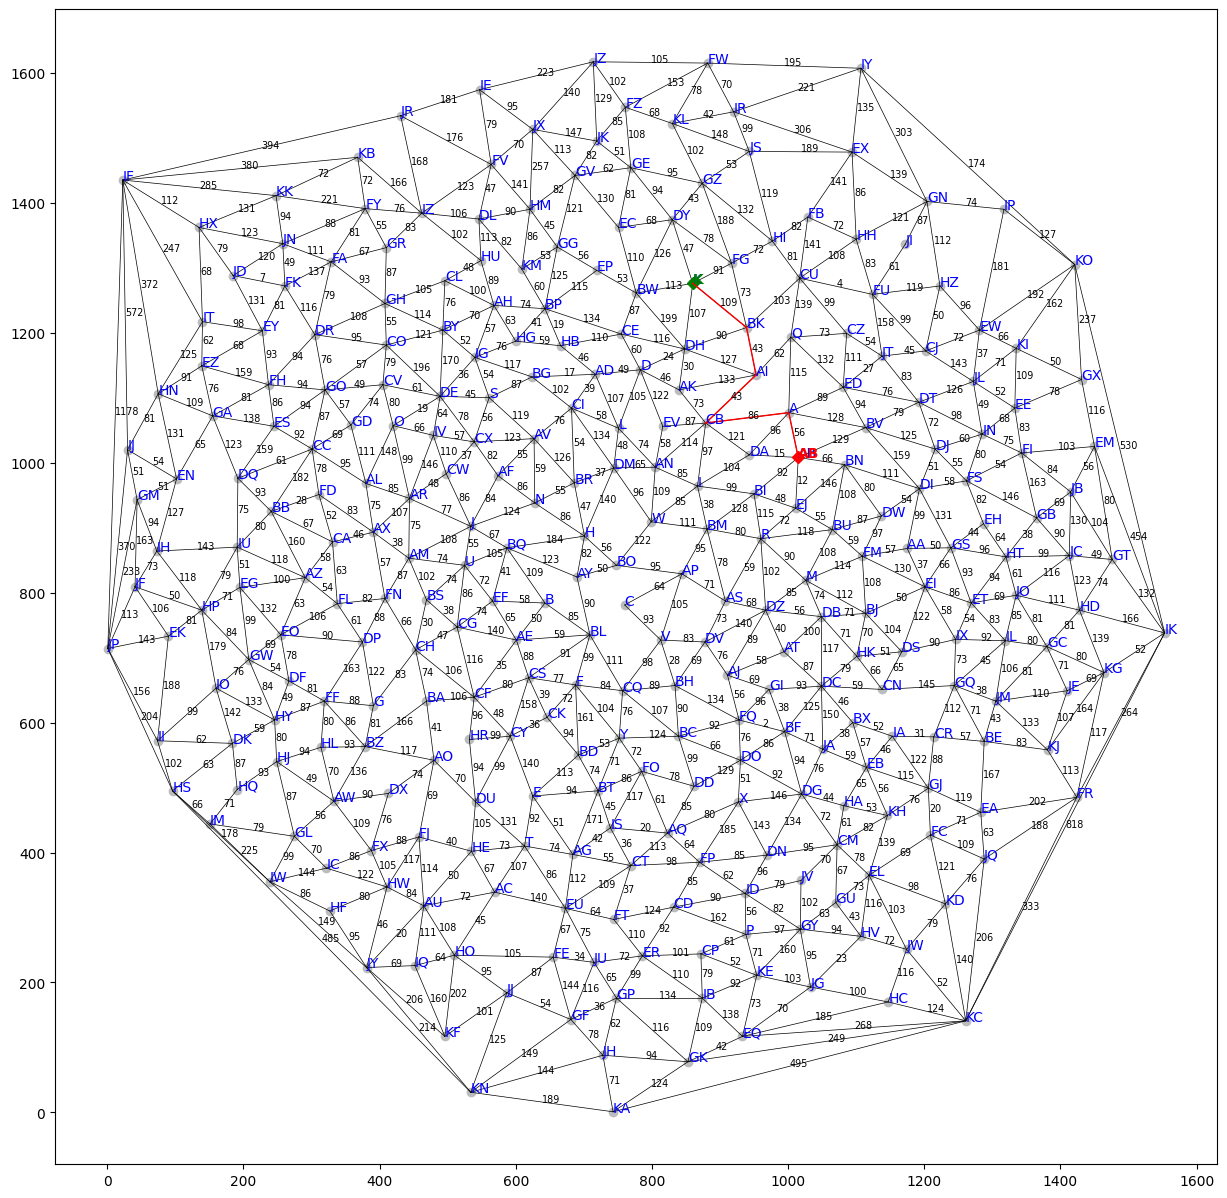

ENDED HERE:
LABEL: AB
PATH: [(K, 0.00), (BK, 322.95), (AI, 293.33), (CB, 340.96), (A, 351.41), (AB, 337.00)]
COST: 337

STATS:
AVG_OPEN: 8.88
MAX_OPEN: 16.00

AVG_DEPTH: 3.25
MAX_DEPTH: 6.00

AVG_BRANCHING_FACTOR: 4.88


In [25]:
searcher = Searcher(graph, 'A*', new_start, new_end, heuristic='SLD', graph_viz=graph_viz)
searcher.search()

In [26]:
searcher = Searcher(graph, 'A*', start, end, heuristic='DIR')
searcher.search()

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/300node.txt.'
Heuristic 'DIR' will be used.
Your start node is '(BX, 0.00)' and your goal(s) are '[(K, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: K
PATH: [(BX, 0.00), (DC, 0.35), (AT, 0.51), (DZ, 0.17), (R, 0.15), (EJ, 1.08), (AB, 0.46), (DA, 0.99), (CB, 0.61), (AK, 0.56), (DH, 0.00), (K, 705.00)]
COST: 705

STATS:
AVG_OPEN: 19.45
MAX_OPEN: 34.00

AVG_DEPTH: 6.23
MAX_DEPTH: 12.00

AVG_BRANCHING_FACTOR: 5.41


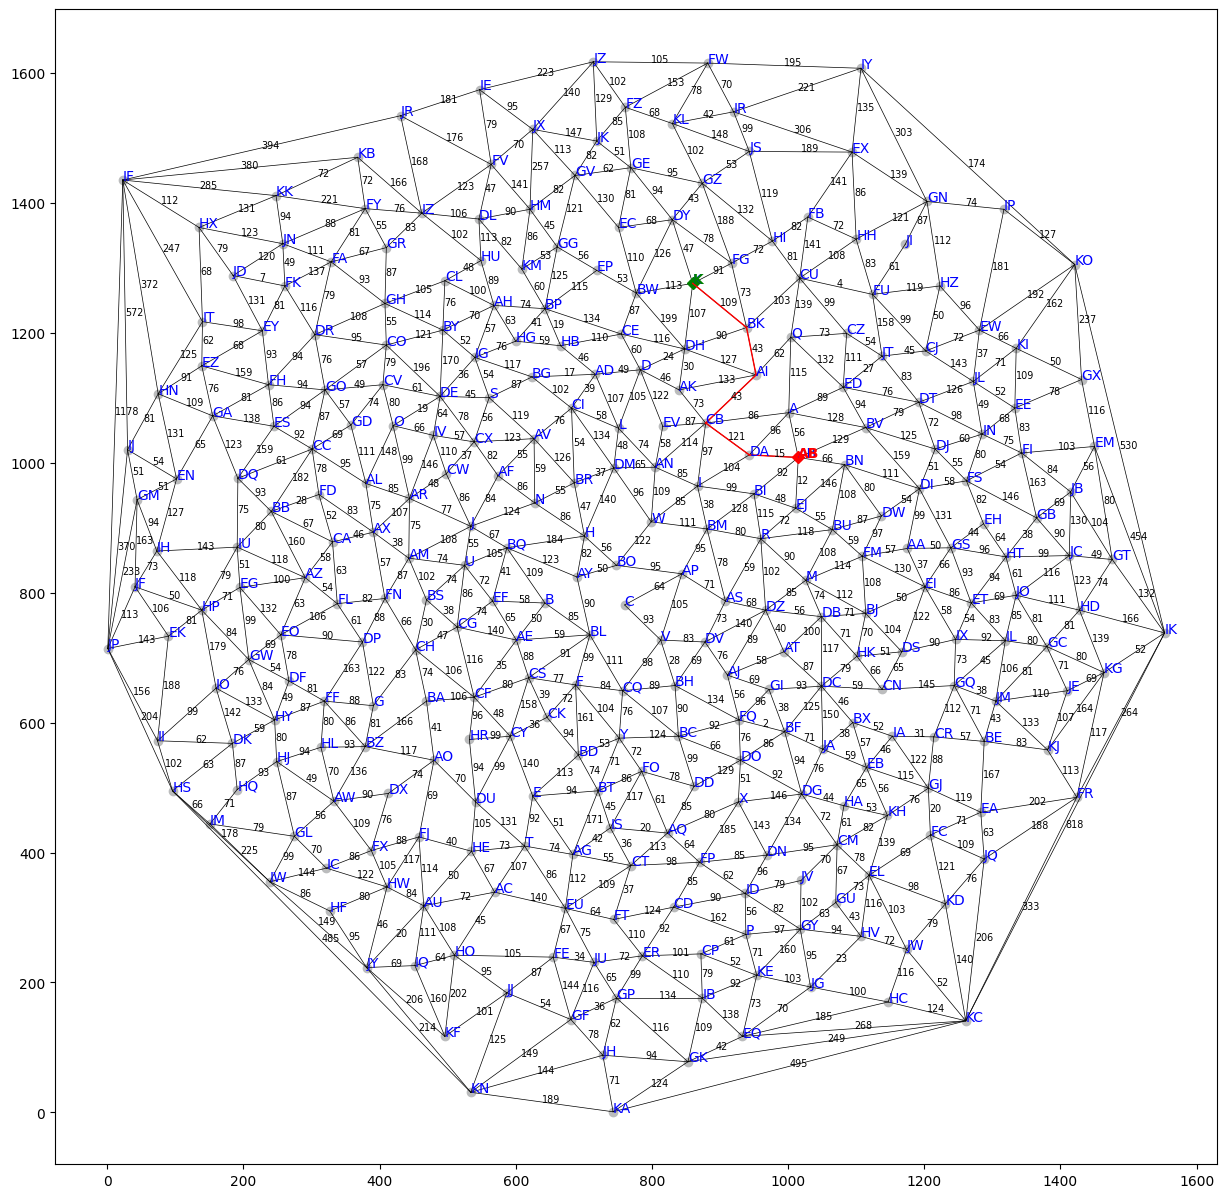

ENDED HERE:
LABEL: AB
PATH: [(K, 0.00), (BK, 0.34), (AI, 0.17), (CB, 1.24), (DA, 0.28), (AB, 331.00)]
COST: 331

STATS:
AVG_OPEN: 7.67
MAX_OPEN: 12.00

AVG_DEPTH: 3.33
MAX_DEPTH: 6.00

AVG_BRANCHING_FACTOR: 4.75


In [27]:
searcher = Searcher(graph, 'A*', new_start, new_end, heuristic='DIR', graph_viz=graph_viz)
searcher.search()